# Set-up

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
raw_img = cv2.imread('DropletPNGS/30_30_1.png')
def imshow(img):
    cv2.imshow('edges', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [1]:
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray_img, 50, 110)
gray = cv2.medianBlur(gray_img, 5) 
 
rows = gray.shape[0]

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30, minRadius=1, maxRadius=30)
# imshow(edges)
# imshow(circles)
# print(circles)
for circle in circles[0, :]:
    print(circle[0])
    cv2.circle(raw_img, (round(circle[0]), round(circle[1])), round(circle[2]), (0, 255, 0))

imshow(raw_img)

NameError: name 'cv2' is not defined

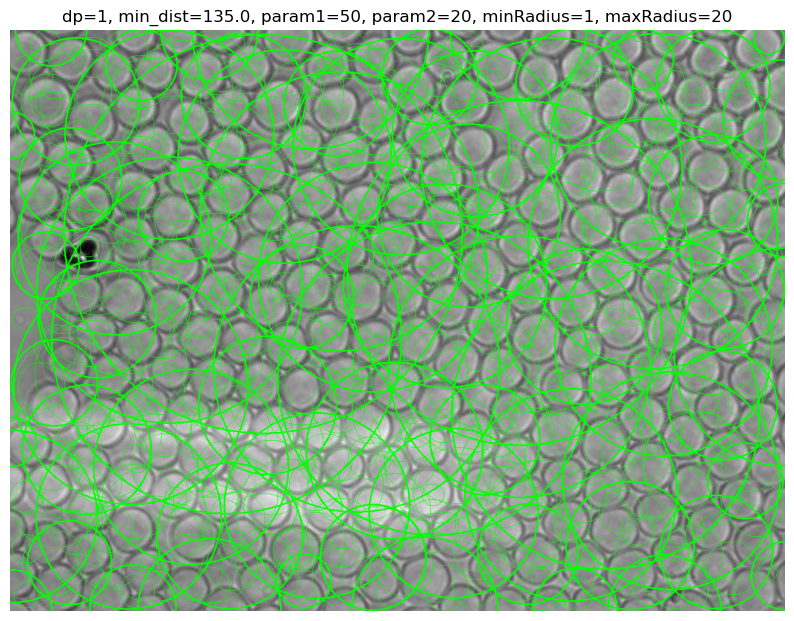

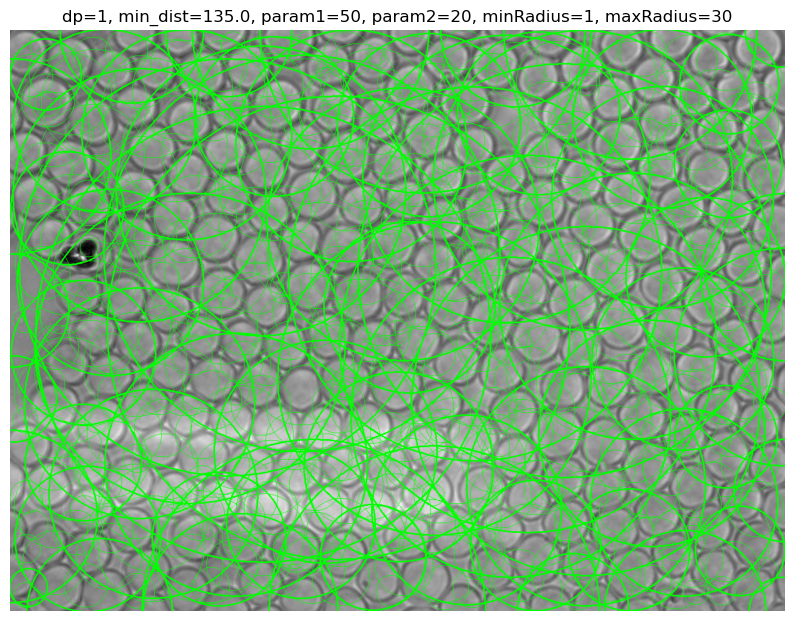

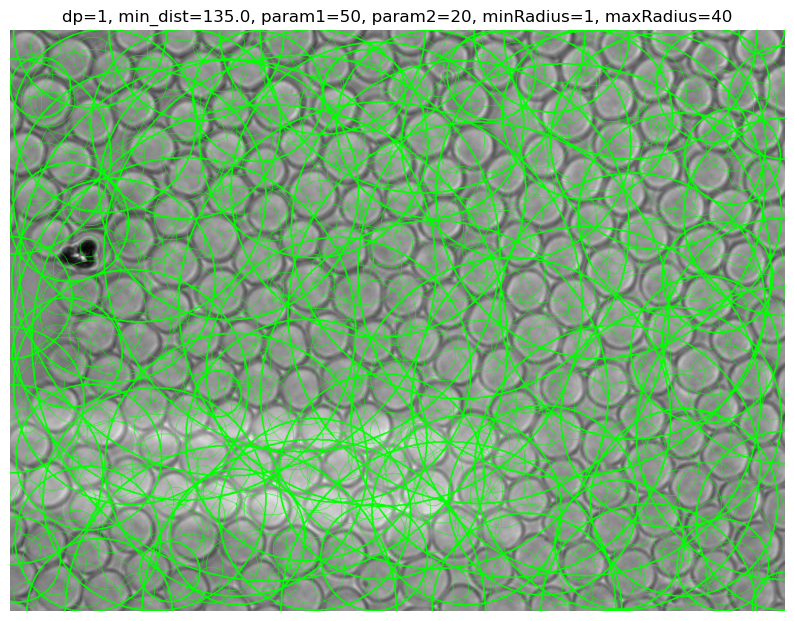

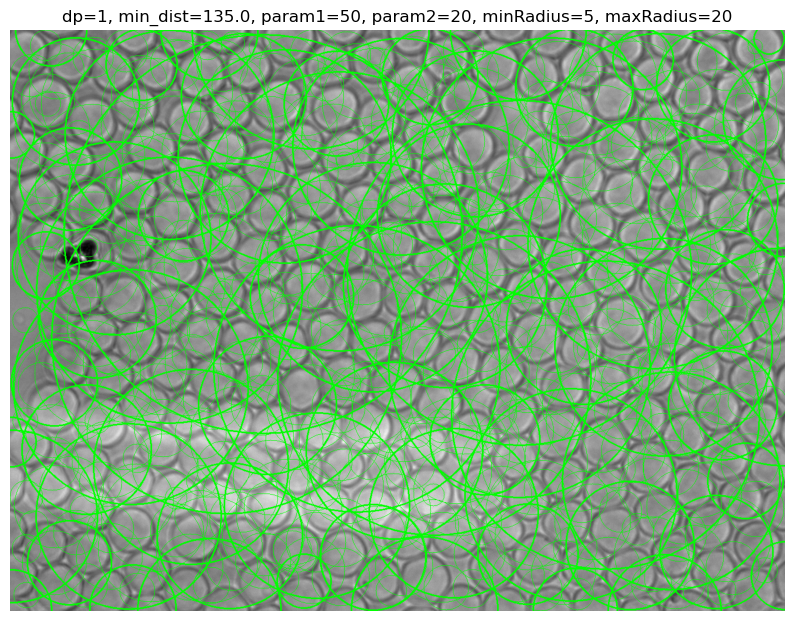

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
rows = gray.shape[0]

# Parameters to try
dp_values = [1, 1.5, 2]
min_dist_values = [rows/8, rows/6, rows/4]
param1_values = [50, 100, 150]
param2_values = [20, 30, 40]
min_radius_values = [1, 5, 10]
max_radius_values = [20, 30, 40]

# Function to detect and draw circles
def detect_and_draw_circles(image, params):
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, *params)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
    return image

# Iterate through parameter combinations
for dp in dp_values:
    for min_dist in min_dist_values:
        for param1 in param1_values:
            for param2 in param2_values:
                for min_radius in min_radius_values:
                    for max_radius in max_radius_values:
                        params = (dp, min_dist, param1, param2, min_radius, max_radius)
                        result = detect_and_draw_circles(raw_img.copy(), params)
                        
                        plt.figure(figsize=(10, 10))
                        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
                        plt.title(f"dp={dp}, min_dist={min_dist}, param1={param1}, "
                                  f"param2={param2}, minRadius={min_radius}, maxRadius={max_radius}")
                        plt.axis('off')
                        plt.show()